# League of Legends Analysis for 51,490 Played Game
## Leyla Alas 090190739

As I explained in 'Project Proposal', I am League of Legends player for years. So, I decided to prepare my first **Data Science** project about this game. This project contains *data cleaning, data visualization, making data readable and some analysis*. We will see 'What is the data?', 'What does it contain?', 'What can we do with this data?'.

In this project, I am going to use these libraries. 
+ **Matplotlib** and **Seaborn** libraries are for data visualization.
+ **pandas** and **numpy** are the most helpful libraries with data.
+ **tabulate** is for make a table from dataframe and its values.
+ **urlopen** is used for accepting the data from online sources.

In [672]:
import matplotlib
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

from tabulate import tabulate
from urllib.request import urlopen

## Data Cleaning and Acquisition

#### Receiving  Data

Here, I couldnot find a way to open these json files online. So, I opened them from my files. It is local study because of this part of my project. I found a way to download this files to the reader's computer, but this way, it makes my project untrusted. Actually, It was asking Kaggle account to download the json files, but not everyone has an account. Therefore, I decided to use this way.
+ The cell below takes us to the file where the json files in.
+ Then, this json files are read.

In [2]:
for dirname, _, filenames in os.walk('/Desktop/dersler/data/proje/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data_champ = pd.read_json('champion_info.json')
data_champ2 = pd.read_json('champion_info_2.json')
data_spell = pd.read_json('summoner_spell_info.json')


+ Here, I made the read json files more readable.
+ with the first reading, I am taking the data but the second reading, I observed nested information in this json files. To acces this informations, I did this.



In [4]:
champInfo = pd.read_json((data_champ["data"]).to_json(),orient = "index")
champInfo = champInfo.sort_values(by='id',ascending = True)

champInfo2 = pd.read_json((data_champ2['data']).to_json(), orient='index')
champInfo2 = champInfo2.sort_values(by='id',ascending = True)
champInfo2 = champInfo2.drop('None')

spellInfo = pd.read_json((data_spell['data']).to_json(), orient='index')
spellInfo = spellInfo.sort_values(by='id',ascending = True)

+ Here is our the most significant dataset. I found it via [Github](https://github.com/leomaurodesenv/game-datasets).
+ It consist of 51490 row and 61 columns.
+ Each row represents a ranked game played during 9th season of League of Legends in Europe server.
+ We will see columns are about gameplays.
+ Basically, I can say that columns contains who pick/ban which champion and takes objectives.
+ Objectives are baron, dragon, rift herald, inhibitor, towers and first blood.
+ All of them make easy to win game. But, baron, dragon, rift herald provide the team special abilities like more damage or protection. Towers, inhibitors and first blood provides more gold to the team who takes one of them.

In the data, champions are given some numerical codes. I changed it later with the original names of champions. Same goes for the summoner spells. I could change it because I have json files. They contain champions numerical codes and their tags. Tags mean that what group can be the champion in. For summoner spells, it contains numerical codes and explanation what the spell is use.

In [683]:
with urlopen('https://raw.githubusercontent.com/Datamanim/pandas/main/lol.csv') as url:
    data_games = pd.read_csv(url, sep = '\t')
data_games

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


The original data will be changed later on. So, I want to keep numerical form some of the data's columns. I will use it Data Visualization.

In [154]:
num_data_games = data_games[["firstInhibitor","firstBaron","firstRiftHerald","winner"]]

+ The cell below involve the data's column names. We can see that the information belonging to the first team and the second team is stored in this data.
+ It can be understood from this dataset which team gets the tasks first.

In [171]:
data_games.keys()

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

+ I am checking for missing data. But there is no missing data in this dataset.

In [157]:
data_games.isnull().sum().sum()

0

+ In fact, the teams are divided into red and blue in the game. 
+ So, in this dataset, I changed the teams indicated as 1 and 2 so that 1 corresponds to the red team, and 2 corresponds to the blue team.

In [579]:
data_games["winner"].replace({1: "Red Team", 2: "Blue Team"}, inplace=True)
data_games["firstBlood"].replace({1: "Red Team", 2: "Blue Team", 0: "Neither of the two teams"},inplace=True)
data_games["firstTower"].replace({1: "Red Team", 2: "Blue Team", 0: "Neither of the two teams"}, inplace=True)
data_games["firstInhibitor"].replace({1: "Red Team", 2: "Blue Team", 0: "Neither of the two teams"}, inplace=True)
data_games["firstBaron"].replace({1: "Red Team", 2: "Blue Team", 0: "Neither of the two teams"}, inplace=True)
data_games["firstDragon"].replace({1: "Red Team", 2: "Blue Team", 0: "Neither of the two teams"}, inplace=True)
data_games["firstRiftHerald"].replace({1: "Red Team", 2: "Blue Team", 0: "Neither of the two teams"}, inplace=True)

+ Here, as I mentioned before, I am translating characters and spells given as numerical code into their actual names.
+ However, this process was very costly. 
+ It took too long to replace numbers with names because the data was so large.
+ I wasted the most time placing the spell names because there are 10 players in the 51490 game and each uses two spells. 
+ This brings the number of boxes that need to be translated to approximately one million.
+ In theory, the total time I spend for picked champions and banned champions is the time I spend for spell.
+ Because the total number of transactions in both is equal to the number of transactions for spell.

In [538]:
data_sumspell = data_games[['t1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2','t1_champ3_sum1','t1_champ3_sum2','t1_champ4_sum1','t1_champ4_sum2','t1_champ5_sum1','t1_champ5_sum2','t2_champ1_sum1','t2_champ1_sum2','t2_champ2_sum1','t2_champ2_sum2','t2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2','t2_champ5_sum1','t2_champ5_sum2']]

spell_dict = pd.Series(spellInfo.name.values,index=spellInfo.id).to_dict()

a = data_sumspell.shape
for i in range(a[0]):
    for j in range(a[1]):
        data_sumspell.iloc[i,j] = spell_dict[data_sumspell.iloc[i,j]]

In [14]:
data_bannedcha = data_games[['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5','t2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5']]

name_dict = pd.Series(champInfo.key.values,index=champInfo.id).to_dict()

a = data_bannedcha.shape
for i in range(a[0]):
    for j in range(a[1]):
        if(data_bannedcha.iloc[i,j] != -1):
            data_bannedcha.iloc[i,j] = name_dict[data_bannedcha.iloc[i,j]]

In [26]:
data_players = data_games[['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id', 't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id']]

name_dict = pd.Series(champInfo.key.values,index=champInfo.id).to_dict()

a = data_players.shape
for i in range(a[0]):
    for j in range(a[1]):
        data_players.iloc[i,j] = name_dict[data_players.iloc[i,j]]

## Data Visualization

In this part of this project, I will do some visualization about the data. It will help the reader to understand the data and its content.

+ I started with the basic table. 
+ I created a table of columns of data with the same values.
+ At first, I thought there were only red and blue teams, but later on, when I saw that the numbers did not match, I realized that both teams did not take these objectives. 
+ I rearranged the data accordingly and created this table.
+ Before, I noticed that winner was in the first place, it didn't put the situation where no one got objective, so I added it to the end. 
+ Since winner does not have this line, I replaced that part with 0.

In [132]:
df = pd.DataFrame()
df['firstRiftHerald'] = data_games['firstRiftHerald'].value_counts().to_frame()
df['firstBlood'] = data_games['firstBlood'].value_counts().to_frame()
df['firstTower'] = data_games['firstTower'].value_counts().to_frame()
df['firstInhibitor'] = data_games['firstInhibitor'].value_counts().to_frame()
df['firstBaron'] = data_games['firstBaron'].value_counts().to_frame()
df['firstDragon'] = data_games['firstDragon'].value_counts().to_frame()
df['winner'] = data_games['winner'].value_counts().to_frame()
df.iloc[0,6] = 0

In [133]:
print(tabulate(df, headers = 'keys', tablefmt = 'pretty'))

+--------------------------+-----------------+------------+------------+----------------+------------+-------------+---------+
|                          | firstRiftHerald | firstBlood | firstTower | firstInhibitor | firstBaron | firstDragon | winner  |
+--------------------------+-----------------+------------+------------+----------------+------------+-------------+---------+
| Neither of the two teams |     26179.0     |   555.0    |   1213.0   |     6276.0     |  20258.0   |   2000.0    |   0.0   |
|         Red Team         |     12948.0     |  26113.0   |  25861.0   |    23054.0     |  14758.0   |   24690.0   | 26077.0 |
|        Blue Team         |     12363.0     |  24822.0   |  24416.0   |    22160.0     |  16474.0   |   24800.0   | 25413.0 |
+--------------------------+-----------------+------------+------------+----------------+------------+-------------+---------+


+ I re-displayed the values I wrote as a table above as a pie chart. Here, the red color catches our eye intensely, as the red team is mostly ahead of the blue team in objective taking.
+ I created two for loops to write the pie charts using subplot and kept an x variable to navigate the columns in the data named df.

In [146]:
fig = plt.figure(figsize=(18,10), dpi=1700)
x1 = list(df.index)

x = 0
for i in range(3):
    for j in range(3):
        if(x==7):
            break
        else:
            y = np.array(df.iloc[:,x])
            ax1 = plt.subplot2grid((3,3),(i,j))
            plt.pie(y, labels = x1)
            plt.title(df.columns[x])
            x = x+1
        
plt.show()

+ I created 3 heatmaps here. Heatmaps tell us how the values at their corners relate to each other. The darker the color, the more irrelevant the values are from each other. 
+ First, I took a general case and then reduced it to team 1 and team 2.
+ We can say that killing a baron and taking riftherald are not really related to each other.
+ Each heatmap has its darkest color at the intersection of baron killing and taking riftherald.

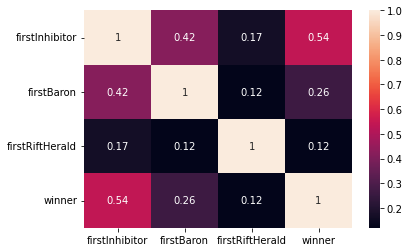

In [155]:
sns.heatmap(num_data_games[["firstInhibitor","firstBaron","firstRiftHerald","winner"]].corr(),annot = True)
plt.show()

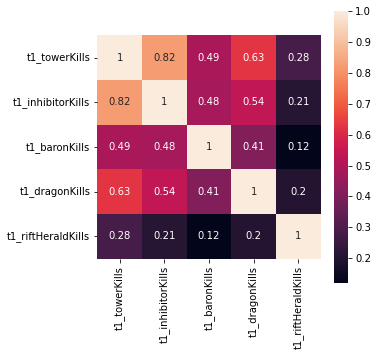

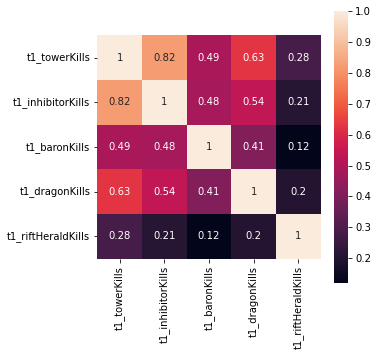

In [611]:
data1 = data_games[['winner','firstBlood','t1_towerKills','t1_inhibitorKills','t1_baronKills','t1_dragonKills','t1_riftHeraldKills']]
data1.replace({'winner': {2:0}},inplace=True)
data1['firstBlood'].replace(2, 0,inplace=True)
graph = plt.figure(figsize=(5,5))
sns.heatmap(data1.corr(), annot=True,square=True)
plt.show()


data2 = data_games[['winner','firstBlood','t2_towerKills','t2_inhibitorKills','t2_baronKills','t2_dragonKills','t2_riftHeraldKills']]
data2.replace({'winner': {2:0}},inplace=True)
data2['firstBlood'].replace(2, 0,inplace=True)
graph = plt.figure(figsize=(5,5))
sns.heatmap(data1.corr(), annot=True,square=True)
plt.show()

+ Here I am reviewing the status of the tasks that the teams take. 
+ On average, the red team got more turrets, inhibitors, and riftheralds. the blue team got more barons and dragons on average.
+ Between these games, the maximum tower taken is 11 in the red and blue team, the maximum inhibitory received is 10 in the red and blue team, the maximum taken in the dragon red and blue team is 6, the maximum riftherald received is 1 in the red and blue team.
+ Finally, the red team can get a maximum of 5 barons, while the blue team can get a maximum of 4 barons.

In [145]:
df_post_start = data_games.iloc[:, [5, 6, 7, 8, 9, 10, 26, 27, 28, 29, 30, 51, 52, 53, 54, 55]]
df_post_start.describe()

,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
count,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,5.699359,1.017537,0.372286,1.387182,0.251466,5.549466,0.985084,0.414547,1.404370,0.240105
std,3.799808,1.263934,0.583934,1.206818,0.433860,3.860989,1.256284,0.613768,1.224492,0.427151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000
75%,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000
max,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000


+ I created the graph about how long each game was played by writing a function.
+ Then I created another chart containing the games above a certain time using the same function.

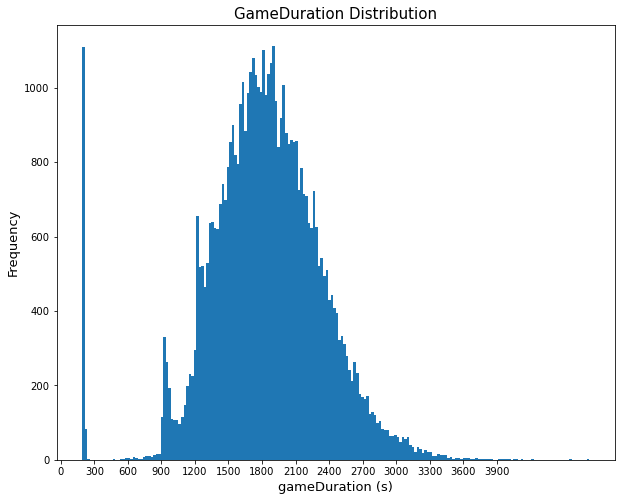

In [590]:
def pltDuration(data):
    plt.figure(figsize = (10, 8))
    Duration_plot = plt.hist(data['gameDuration'], bins = 200)
    my_x_ticks = np.arange(0, 4200, 300)
    plt.xticks(my_x_ticks)
    plt.xlabel("gameDuration (s)", fontsize = 13)
    plt.ylabel('Frequency', fontsize = 13)
    plt.title('GameDuration Distribution', fontsize = 15)
    plt.show()
pltDuration(data_games)

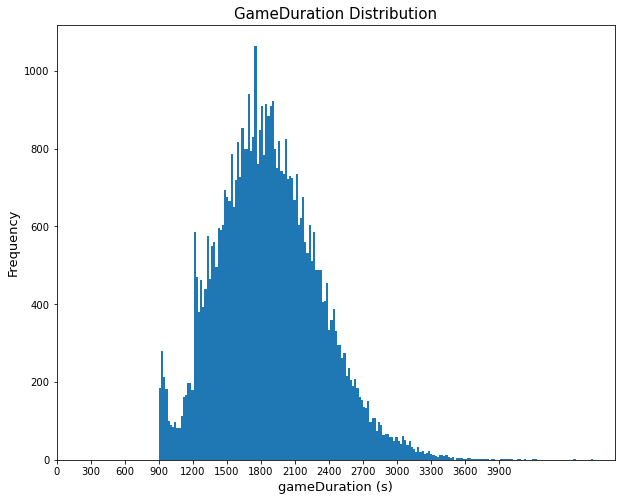

In [592]:
data = data_games[data_games['gameDuration'] >= 900]
pltDuration(data)

## Data Analysis

### About time

In [680]:
print('An average game takes', st.mean(data_games['gameDuration'])/60, 'minutes.')
print('The longest game is', max(data_games['gameDuration'])/60, 'minutes.')
print('The shortest game is', min(data_games['gameDuration'])/60, 'minutes.')

An average game takes 30.539380138538228 minutes.
The longest game is 78.8 minutes.
The shortest game is 3.1666666666666665 minutes.


+ Here, I calculate games lasting less than 3 minutes, games ending between 15th and 16th minutes, games lasting more than 50 minutes and games ending in the average game time of 30 minutes.

In [687]:
less_3 = data_games[data_games['gameDuration'] < 3*60]
bet_1516 = data_games[(data_games['gameDuration'] > 15*60) & (data_games['gameDuration'] < 16*60)]
more_50 = data_games[data_games['gameDuration'] > 50*60]
minu_30 = data_games[data_games['gameDuration'] == 30*60]
print(len(less_3))
print(len(bet_1516))
print(len(more_50))
print(len(minu_30))

0
688
684
40


### About Picks, Bans and Spells

In this project, I wanted to calculate how many times champions were played on this data.
+ First, I grouped the first column of the data containing the player information, and then grouped the next columns. 
+ Then I gathered the sizes and got the result I wanted.

In [582]:
w = data_players.groupby([data_players.columns[0]]).size()
for i in range(1,len(data_players.columns)):
    w = w + data_players.groupby([data_players.columns[i]]).size()
print(w.sum())
a = w.to_frame()
a = a.sort_values(by=0, ascending = False)
a = a.reset_index()
a.rename(columns = {'t1_champ1id':'Champions', 0:'Count'}, inplace = True)
a

514900


,Champions,Count
0,Thresh,13002
1,Tristana,12983
2,Vayne,10658
3,Kayn,9853
4,LeeSin,9188
...,...,...
133,Ryze,1032
134,Karthus,1007
135,AurelionSol,841
136,Aatrox,753


+ Here I calculate the win rate of the most played character.

In [688]:
wongameTh = 0
for i in range(len(data_players)):
    for j in range(len(data_players.columns)):
        if(data_players.iloc[i,j]=='Thresh' and j<4):
            if(data_games.loc[i,('winner')]=='Red Team'):
                wongameTh = wongameTh+1
        elif(data_players.iloc[i,j]=='Thresh' and j>4):
            if(data_games.loc[i,('winner')]=='Blue Team'):
                wongameTh = wongameTh+1
print('Win rate of Thresh', wongameTh/int(a.iloc[0,1])*100)

Win rate of Thresh 0.0


+ Then I found out what the roles of the characters played and calculated how many games were played on a role basis.

In [450]:
tags = champInfo2.loc[:,('tags')].to_list()
uniq_tags = []
for x in tags:
    if x not in uniq_tags:
        uniq_tags.append(x)

In [497]:
champInfo2_new = champInfo2.reset_index(drop=True)

uniq_tags2 = pd.Series(uniq_tags)
count_roles = pd.DataFrame(uniq_tags2)
count_roles.rename(columns = {0:'Roles'}, inplace = True)
count_roles = count_roles.assign(Count = 0)

for i in range(len(count_roles)):
    for j in range(len(champInfo2_new)):
        if(champInfo2_new.loc[j,('tags')]==count_roles.iloc[i,0]):
            count_roles.iloc[i,1] = count_roles.iloc[i,1] + int(a[a['Champions']==champInfo2_new.loc[j,('key')]]['Count'])
        else:
            continue
print(count_roles['Count'].sum())
count_roles

514900


,Roles,Count
0,[Mage],26804
1,"[Fighter, Tank]",47653
2,"[Tank, Mage]",13514
3,"[Fighter, Assassin]",57958
4,"[Fighter, Marksman]",5564
5,"[Assassin, Mage]",10311
6,"[Mage, Tank]",3203
7,"[Mage, Support]",36583
8,"[Fighter, Support]",2003
9,"[Assassin, Fighter]",33747


+ I did the same procedure for the banned champions. 
+ First of all, I calculated how much a character is banned. 
+ Then I calculated how many bans occurred according to the roles of these characters.

In [502]:
y = data_bannedcha.groupby([data_bannedcha.columns[0]]).size()
for i in range(1,len(data_bannedcha.columns)):
    y = y + data_bannedcha.groupby([data_bannedcha.columns[i]]).size()
print(y.sum())
b = y.to_frame()
b = b.sort_values(by=0, ascending = False)
b = b.reset_index()
b.rename(columns = {'t1_ban1':'Banned Champions', 0:'Count'}, inplace = True)
b

514900


,Banned Champions,Count
0,Yasuo,33015
1,Zed,25393
2,Chogath,25175
3,Darius,22870
4,Janna,21390
...,...,...
134,Viktor,128
135,Sion,117
136,Ryze,96
137,Udyr,90


+ Since Yasuo is the most banned character, I measure the win rate of those who ban him.

In [587]:
bangameYsuo = 0
for i in range(len(data_bannedcha)):
    for j in range(len(data_bannedcha.columns)):
        if(data_bannedcha.iloc[i,j]=='Yasuo' and j<4):
            if(data_games.loc[i,('winner')]=='Red Team'):
                bangameYsuo = bangameYsuo+1
        elif(data_bannedcha.iloc[i,j]=='Yasuo' and j>4):
            if(data_games.loc[i,('winner')]=='Blue Team'):
                bangameYsuo = bangameYsuo+1
print(bangameYsuo/int(b.iloc[0,1])*100)

44.782674541874904


+ Here I calculate the ban according to the roles.

In [506]:
uniq_tags2 = pd.Series(uniq_tags)
banned_roles = pd.DataFrame(uniq_tags2)
banned_roles.rename(columns = {0:'Roles'}, inplace = True)
banned_roles = count_roles.assign(Count = 0)

for i in range(len(banned_roles)):
    for j in range(len(champInfo2_new)):
        if(champInfo2_new.loc[j,('tags')]==banned_roles.iloc[i,0]):
            banned_roles.iloc[i,1] = banned_roles.iloc[i,1] + int(b[b['Banned Champions']==champInfo2_new.loc[j,('key')]]['Count'])
        else:
            continue
print(banned_roles['Count'].sum())
banned_roles

511034


,Roles,Count
0,[Mage],9317
1,"[Fighter, Tank]",53216
2,"[Tank, Mage]",35154
3,"[Fighter, Assassin]",92713
4,"[Fighter, Marksman]",6425
5,"[Assassin, Mage]",16604
6,"[Mage, Tank]",3167
7,"[Mage, Support]",15063
8,"[Fighter, Support]",651
9,"[Assassin, Fighter]",58926


+ In this section, I access the data of some non-banned players. 
+ This option is also available in the game. 
+ But since there is no empty ban data specified with -1 in the given json files, I am counting it in the modified data here.

In [507]:
x = (data_bannedcha == -1).sum()
x.sum()
#bos ban

3866

+ I am providing the data. the sum is equal to ten times played games.

In [510]:
banned_roles['Count'].sum()+x.sum()

514900

+ Here I'm looking at how many times players have received spells that players have in the game. 
+ As you can see, it is mostly preferred by flash players. 
+ Almost all players on both teams got this spell as they entered the game.

In [540]:
z = data_sumspell.groupby([data_sumspell.columns[0]]).size()
for i in range(1,len(data_sumspell.columns)):
    z = z + data_sumspell.groupby([data_sumspell.columns[i]]).size()
print(z.sum())
c = z.to_frame()
c = c.sort_values(by=0, ascending = False)
c = c.reset_index()
c.rename(columns = {'t1_champ1_sum1':'Summoner Spell', 0:'Count'}, inplace = True)
c

1029800


,Summoner Spell,Count
0,Flash,504121
1,Teleport,109401
2,Heal,108043
3,Smite,103062
4,Ignite,88258
5,Exhaust,84576
6,Barrier,14880
7,Ghost,14305
8,Cleanse,3154


# REFERENCES
+ [how to input json files](https://www.kaggle.com/code/newboss/project)
+ [heatmap examples](https://www.kaggle.com/code/brittanyutech/project)
+ [describe](https://www.kaggle.com/code/simonwellenreiter/lol-classifier)
+ [bar chart examples](https://www.kaggle.com/code/acarahmet/league-of-legends#Looking-at-the-data)
+ [dataset link](https://www.datamanim.com/dataset/99_pandas/pandasMain.html)
+ [main kaggle page](https://www.kaggle.com/datasets/datasnaek/league-of-legends)